In [ ]:
from google.colab import drive

#This code makes sure that your colab has the most recent version of packages that we will use, and loads these packages.

!pip install --upgrade pip
!pip install --upgrade Pillow
!pip install -U pandas-profiling

#Packages for profiling
from pathlib import Path
import pandas as pd
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
!pip install pyreadstat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.1.2
    Uninstalling pip-23.1.2:
      Successfully uninstalled pip-23.1.2
  Obtaining dependency information for Pillow from https://files.pythonhosted.org/packages/7a/07/e896b096a77375e78e02ce222ae4fd6014928cd76c691d312060a1645dfa/Pillow-10.0.1-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.4 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: Pillow 9.4.0
    Uninstalling Pillow-9.4.0:
      Successfully uninstalled Pillow-9.4.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.1 MB/s eta 0:00:00
  Obtaining dependency information for ydata-profiling from https://files.pythonhosted.org/packages/09/98/5a5fbfd48bf23acd3ceed5114d073b877965816304078151fefbf86d8458/ydata_profiling-4.5.1-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 11.5 MB/s eta 0:00:00
  Obtaining dependency information for multimethod<2,>=1.4 from https://files.pythonhosted.org/packages/7f/bd/750245e47e7f307d9f94d4fa84727f4ed9956005dfa671d58be1d531a0f6/multimethod-1.10-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 10.6 MB/s eta 0:00:00
  Obtaining dependency information for dacite>=1.8 from https://files.pythonhosted.org/packages/21/0f/cf0943f4f55f0fbc7c6bd60caf1343061dff818b02af5a0d444e473bb78d/dacite-1.8.1-py3-none-any.whl.metadata


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_cl = pd.read_stata('/content/drive/My Drive/cepsw1teacherEN.dta')
df_st = pd.read_stata('/content/drive/My Drive/cepsw1studentEN.dta')
df_sc = pd.read_stata('/content/drive/My Drive/cepsw1principalEN.dta')

In [ ]:
column_names = df_cl.columns
column_names_list = column_names.tolist()
print(column_names_list)
print()
column_names = df_st.columns
column_names_list = column_names.tolist()
print(column_names_list)


column_names = df_sc.columns
column_names_list = column_names.tolist()
print(column_names_list)



['clsids', 'schids', 'ctyids', 'frame', 'subsample', 'fall', 'grade9', 'hra01', 'hra02', 'hra03', 'hra04', 'hra05', 'hra06', 'hra07', 'hra08', 'hra09', 'hra10', 'hra11', 'hra12', 'hra1301', 'hra1302', 'hra1303', 'hra1401', 'hra1402', 'hra1403', 'hra1404', 'hra1501', 'hra1502', 'hra1503', 'hra1504', 'hra1601', 'hra1602', 'hra1603', 'hra1604', 'hra1605', 'hra1606', 'hra1607', 'hra1608', 'hra1609', 'hra1610', 'hra1701', 'hra1702', 'hra1703', 'hra1704', 'hra1705', 'hra1706', 'hra1707', 'hra1708', 'hra18', 'hra1901', 'hra1902', 'hra1903', 'hra1904', 'hra1905', 'hra1906', 'hra2001', 'hra2002', 'hra2003', 'hra21a01', 'hra21b01', 'hra21c01', 'hra21a02', 'hra21b02', 'hra21c02', 'hra21a03', 'hra21b03', 'hra21c03', 'hra22', 'hra23', 'hra2400', 'hra2401', 'hra2402', 'hra2403', 'hra2404', 'hra25b01', 'hra25b02', 'hra25b03', 'hra25b04', 'hra25b05', 'hra25c01', 'hra25c02', 'hra25c03', 'hra25c04', 'hra25c05', 'hra25d01', 'hra25d02', 'hra25d03', 'hra25d04', 'hra25d05', 'hra25e01', 'hra25e02', 'hra25e03

In [ ]:
df = pd.merge(df_st, df_sc, on='schids', how='inner')

In [ ]:
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

# Print the first 5 rows of the DataFrame
print(df.head())


   ids  clsids  schids  ctyids_x                                    frame_x  \
0    1       1       1         1  Supplemental sampling frame of the nation   
1    2       1       1         1  Supplemental sampling frame of the nation   
2    3       1       1         1  Supplemental sampling frame of the nation   
3    4       1       1         1  Supplemental sampling frame of the nation   
4    5       1       1         1  Supplemental sampling frame of the nation   

                                         subsample_x     sweight  \
0  sub-sampling frame of districts with large inf...  218.738892   
1  sub-sampling frame of districts with large inf...  216.518234   
2  sub-sampling frame of districts with large inf...  216.518234   
3  sub-sampling frame of districts with large inf...  218.738892   
4  sub-sampling frame of districts with large inf...  217.553040   

           fall_x  grade9  stcog    cog3pl  tr_chn  tr_mat  tr_eng     stdchn  \
0  Spring of 2014  grade7     11  0

In [ ]:
# Filter to get only the students from the west
df_we = df[df['ctyplace'] == 'west']

# Filter to get only the students from the central region
df_mi = df[df['ctyplace'] == 'middle']

# Filter to get only the students from the east
df_ea = df[df['ctyplace'] == 'east']

In [ ]:
# Generate the Profiling Report
profile = ProfileReport(
    df_we, title="Citi Bike Rides", html={"style": {"full_width": True}}, sort=None
)

In [ ]:
!pip install prettytable

In [ ]:

columns_to_keep = [
    'ids' ,
    'stsex',
    'stdmat',
    'sweight',
    'schids',
    'pla18',
    'schrank_5c',
    'schloc_5c',
    'steco_3c',
    'stdmat'
]

# Keep only the columns listed in 'columns_to_keep'
df_we = df_we[columns_to_keep]

from prettytable import PrettyTable
import pandas as pd
from prettytable import PrettyTable

# Assuming df_we is your DataFrame
# If not, please make sure to load and filter your DataFrame first

# Debug: Print the DataFrame and its columns
print("DataFrame:")
print(df_we)
print("Columns:")
print(df_we.columns)

# Initialize a PrettyTable object
table = PrettyTable()
table.field_names = ["Column Name", "Data Type", "Missing Values", "Unique Values", "Top Value", "Freq of Top Value"]

# Loop over columns in DataFrame and add a row in the table for each column
for col in df_we.columns:
    # Debug: Print the column name and its type
    print("Processing Column: ", col)
    print("Column Type: ", type(df_we[col]))

    # Now, try to access dtype and other attributes
    try:
        dtype = df_we[col].dtype
        missing = df_we[col].isnull().sum()
        uniques = df_we[col].nunique()

        if pd.api.types.is_numeric_dtype(df_we[col]):
            top = f"Mean: {df_we[col].mean():.2f}"
            freq = '-'
        else:
            top = df_we[col].mode()[0] if not df_we[col].mode().empty else 'N/A'
            freq = df_we[col].value_counts().iloc[0] if not df_we[col].mode().empty else 'N/A'

        table.add_row([col, dtype, missing, uniques, top, freq])

    except Exception as e:
        print(f"An error occurred while processing column {col}: {e}")

print(table)


DataFrame:
         ids   stsex     stdmat     sweight  schids  pla18      schrank_5c  \
14740  14741    Male  51.260555  320.722504      89  800.0   Below average   
14741  14742  Female  76.129463  322.470703      89  800.0   Below average   
14742  14743    Male  49.347561  319.196960      89  800.0   Below average   
14743  14744    Male  73.068680  319.196960      89  800.0   Below average   
14744  14745  Female  68.860092  322.470703      89  800.0   Below average   
...      ...     ...        ...         ...     ...    ...             ...   
19482  19483  Female        NaN  398.827271     112  330.0  Among the best   
19483  19484    Male  58.570225  417.223358     112  330.0  Among the best   
19484  19485    Male  49.569790  417.223358     112  330.0  Among the best   
19485  19486    Male  60.370312  417.223358     112  330.0  Among the best   
19486  19487    Male  48.669746  417.223358     112  330.0  Among the best   

                                      schloc_5c stec

In [ ]:
u1= df_we['schids'].unique()


# Print or display the unique values
print(u1)


[ 89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106
 107 108 109 110 111 112]


In [ ]:
# Create a copy to get rid of SettingWithCopyWarning
df_we = df_we.copy()

# Create mappings
rank_map = {
    'Among the best': 5,
    'Above average': 4,
    'Average': 3,
    'Below average': 2,
    'Near the bottom': 1
}

location_map = {
    'Center of the city/town': 5,
    'Outskirts of the city/town': 4,
    'Rural-urban fringe zone of the city/town': 3,
    'Towns outside of the city/town': 2,
    'Rural areas': 1
}

# Map the scores
df_we['rank_score'] = df_we['schrank_5c'].map(rank_map).astype(int)
df_we['location_score'] = df_we['schloc_5c'].map(location_map).astype(int)

# Calculate the hybrid score
df_we['hybrid_score'] = df_we['rank_score'] + df_we['location_score']

In [ ]:
u3= df_we['hybrid_score'].unique()
print(u3)

[ 5  9 10  8  7  6]


In [ ]:

# Calculate the weighted average math score for each gender within each school
df_we['weighted_math'] = df_we['stdmat'] * df_we['sweight']
grouped = df_we.groupby(['stsex', 'hybrid_score', 'schids']).agg({'weighted_math': 'sum', 'sweight': 'sum'}).reset_index()
grouped['avg_weighted_math'] = grouped['weighted_math'] / grouped['sweight']

# Calculate the gender gap for each school
pivot_table = pd.pivot_table(grouped, values='avg_weighted_math', index=['hybrid_score', 'schids'], columns=['stsex']).reset_index()
pivot_table['gender_gap'] = (pivot_table['Male'] - pivot_table['Female']).abs()

# Weight the gender gap by the total number of students in each school and sum it for each level of school
total_students_per_school = df_we.groupby(['schids', 'hybrid_score'])['sweight'].sum().reset_index()
pivot_table = pd.merge(pivot_table, total_students_per_school, on=['schids', 'hybrid_score'])
pivot_table['weighted_gender_gap'] = pivot_table['gender_gap'] * pivot_table['sweight']

# Sum these weighted gender gaps for each level of school
final_result = pivot_table.groupby('hybrid_score')['weighted_gender_gap'].sum().reset_index()
print(final_result)

   hybrid_score  weighted_gender_gap
0             5          2883244.000
1             6          2213707.000
2             7          1189332.250
3             8          1330874.875
4             9          6171813.000
5            10          2734609.000


In [ ]:
import pandas as pd
import numpy as np

# Simulated 'final_result' DataFrame
final_result = pd.DataFrame({
    'hybrid_score': [5, 6, 7, 8, 9, 10],
    'weighted_gender_gap': [28.83244000, 22.13707000, 11.89332250, 13.30874875, 61.71813000, 27.34609000]
})

# Total available resources (scaled down)
total_resources = 100 # total resources

# Initialize resource allocation
final_result['Resources'] = 0

# Function to calculate potential effectiveness using Logarithmic Utility
def calculate_P_type(row):
    G_type = row['weighted_gender_gap']
    R_type = row['Resources']
    return np.log(G_type + 1) - np.log(R_type + 1)

# Iterative Resource Allocation
delta_R = 1  # Small unit of resources to allocate in each iteration

while total_resources > 0:
    # Step 1: Calculate P_type for all school types
    final_result['P_type'] = final_result.apply(calculate_P_type, axis=1)

    # Step 2: Find the school type with the highest P_type
    idx_max_P = final_result['P_type'].idxmax()

    # Step 3: Allocate resources to the selected school type
    final_result.at[idx_max_P, 'Resources'] += delta_R

    # Step 4: Update remaining resources
    total_resources -= delta_R

print(final_result)

   hybrid_score  weighted_gender_gap  Resources    P_type
0             5            28.832440         18  0.505225
1             6            22.137070         13  0.502379
2             7            11.893323          7  0.477268
3             8            13.308749          8  0.463647
4             9            61.718130         37  0.501064
5            10            27.346090         17  0.454117


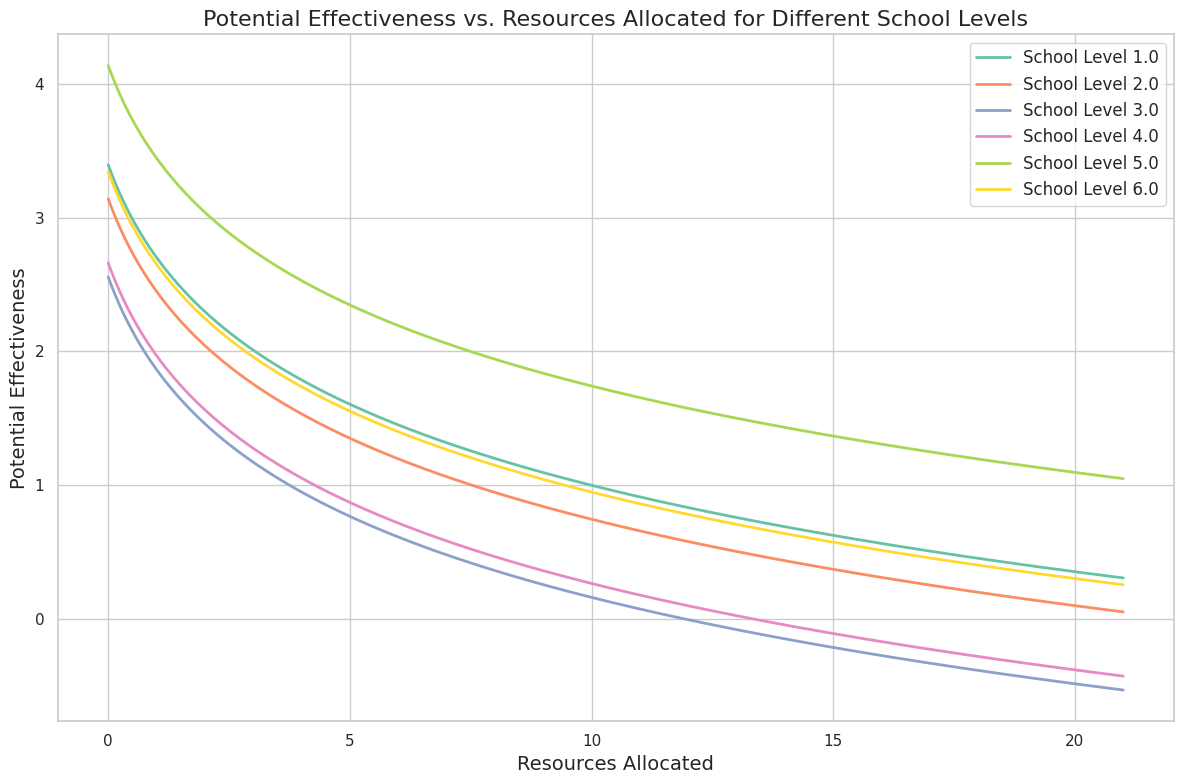

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set Style and Context
sns.set_style("whitegrid")
sns.set_context("notebook")

# Initialize DataFrame
final_result = pd.DataFrame({
    'hybrid_score': [1, 2, 3, 4, 5, 6],
    'weighted_gender_gap': [28.83244000, 22.13707000, 11.89332250, 13.30874875, 61.71813000, 27.34609000]
})

# Define the range of resources.
resources = np.linspace(0, 21, 1000)

# Initialize the figure
fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("Set2", len(final_result))  # Choose a cohesive color palette

# Calculating and Plotting Potential Effectiveness for each school level
for idx, row in final_result.iterrows():
    G_type = row['weighted_gender_gap']
    P_type = [np.log(G_type + 1) - np.log(R + 1) for R in resources]
    ax.plot(resources, P_type, label=f'School Level {row["hybrid_score"]}', color=colors[idx], linewidth=2)

# Refine labels and Titles
ax.set_xlabel('Resources Allocated', fontsize=14)
ax.set_ylabel('Potential Effectiveness', fontsize=14)
ax.set_title('Potential Effectiveness vs. Resources Allocated for Different School Levels', fontsize=16)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()


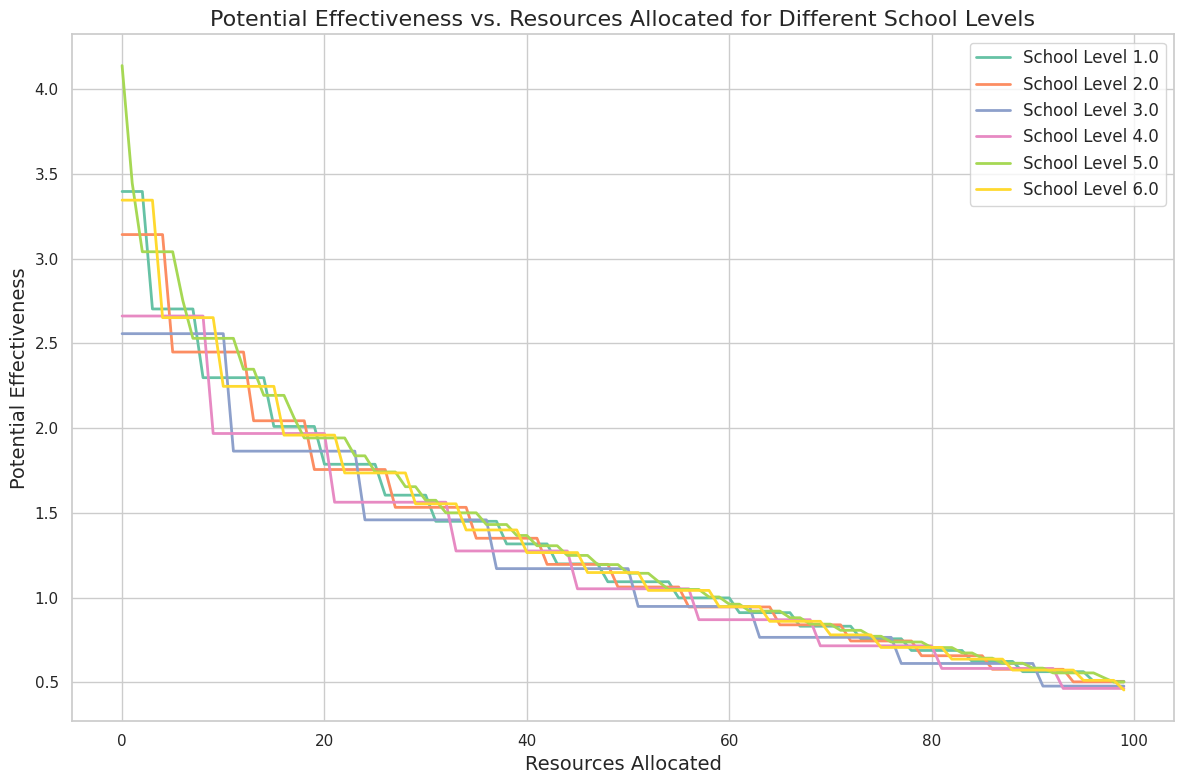

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Set Style and Context
sns.set_style("whitegrid")
sns.set_context("notebook")

# Initialize DataFrame
final_result = pd.DataFrame({
    'hybrid_score': [1, 2, 3, 4, 5, 6],
    'weighted_gender_gap': [28.83244000, 22.13707000, 11.89332250, 13.30874875, 61.71813000, 27.34609000]
})

# Initialize variables
total_resources = 100
final_result['Resources'] = 0
delta_R = 1
pe_dict = {i: [] for i in range(len(final_result))}

def calculate_P_type(row):
    G_type = row['weighted_gender_gap']
    R_type = row['Resources']
    return np.log(G_type + 1) - np.log(R_type + 1)

# Iterative Resource Allocation and storing Potential Effectiveness
while total_resources > 0:
    final_result['P_type'] = final_result.apply(calculate_P_type, axis=1)
    idx_max_P = final_result['P_type'].idxmax()
    final_result.at[idx_max_P, 'Resources'] += delta_R
    total_resources -= delta_R
    for i, row in final_result.iterrows():
        pe_dict[i].append(row['P_type'])

# Plotting the recorded Potential Effectiveness
fig, ax = plt.subplots(figsize=(12, 8))
colors = sns.color_palette("Set2", len(final_result))  # Changed to cohesive color palette

for i, (idx, row) in enumerate(final_result.iterrows()):
    resources_allocated = list(range(len(pe_dict[i])))
    ax.plot(resources_allocated, pe_dict[i], label=f'School Level {row["hybrid_score"]}', color=colors[i], linewidth=2)

# Refine labels and Titles
ax.set_xlabel('Resources Allocated', fontsize=14)
ax.set_ylabel('Potential Effectiveness', fontsize=14)
ax.set_title('Potential Effectiveness vs. Resources Allocated for Different School Levels', fontsize=16)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
df_girls = df_we[df_we['stsex'] == 'Female']  # Replace 'female' with the actual identifier for female students in your dataset

# Calculate the weighted resources for each female student
df_girls['weighted_resource'] = df_girls['pla18'] * df_girls['sweight']

# 2. Group by 'hybrid_score' and sum the weighted resources
grouped_girls = df_girls.groupby('hybrid_score')['weighted_resource'].sum().reset_index(name='Total_Resource_For_Girls')

print(grouped_girls)

   hybrid_score  Total_Resource_For_Girls
0             5              4.055249e+08
1             6              8.180901e+08
2             7              3.238096e+08
3             8              1.912141e+08
4             9              4.947360e+08
5            10              3.103431e+08


<ipython-input-54-a52d2128b6fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_girls['weighted_resource'] = df_girls['pla18'] * df_girls['sweight']


In [ ]:
import pandas as pd

# 1. Merge the two DataFrames on 'hybrid_score'
df_result = pd.merge(final_result, grouped_girls, on='hybrid_score')

# 2. Convert the resource values to percentages
total_optimized = df_result['Resources'].sum()
total_actual = df_result['Total_Resource_For_Girls'].sum()

df_result['Resources_Percentage'] = (df_result['Resources'] / total_optimized)
df_result['Total_Resource_For_Girls_Percentage'] = (df_result['Total_Resource_For_Girls'] / total_actual)

print(df_result)

   hybrid_score  weighted_gender_gap  Resources    P_type  \
0             5             61.71813         37  0.501064   
1             6             27.34609         17  0.454117   

   Total_Resource_For_Girls  Resources_Percentage  \
0              4.055249e+08              0.685185   
1              8.180901e+08              0.314815   

   Total_Resource_For_Girls_Percentage  
0                             0.331415  
1                             0.668585  


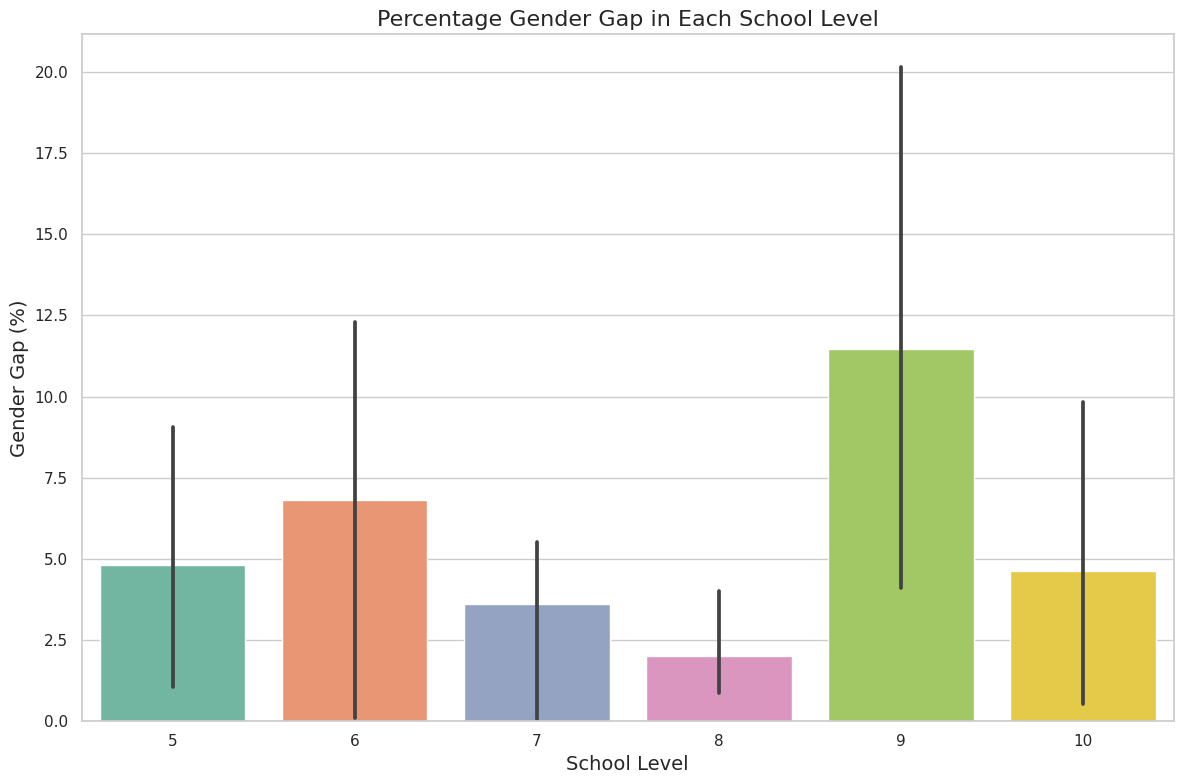

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Style and Context
sns.set_style("whitegrid")
sns.set_context("notebook")

# Calculate the Percentage
total = final_result['weighted_gender_gap'].sum()
final_result['percentage'] = (final_result['weighted_gender_gap'] / total) * 100

# Plot
plt.figure(figsize=(12, 8))  # Adjusted to keep size consistent with other plots
sns.barplot(x='hybrid_score', y='percentage', data=final_result, palette="Set2")  # Changed to a cohesive color palette

plt.xlabel('School Level', fontsize=14)  # Adjusted fontsize
plt.ylabel('Gender Gap (%)', fontsize=14)  # Adjusted fontsize
plt.title('Percentage Gender Gap in Each School Level', fontsize=16)  # Adjusted fontsize
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Your data
predicted = np.array([0.174, 0.135, 0.075, 0.083, 0.367, 0.166])
actual = np.array([0.159422, 0.321612, 0.127298, 0.075171, 0.194493, 0.122004])

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(predicted - actual))

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((actual - predicted) / actual)) * 100

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}%")

Mean Absolute Error (MAE): 0.07963666666666668
Mean Absolute Percentage Error (MAPE): 40.57052272559458%


In [ ]:
import pandas as pd

# Assuming df_we is already loaded and has 'hybrid_score'
# Also assuming you have mapped the steco_5c categories to a new column steco_3c with values 'poor', 'middle', 'rich'

# Calculate the weighted average math score for each gender within each economic category in each school
df_we['weighted_math'] = df_we['stdmat'] * df_we['sweight']
grouped = df_we.groupby(['stsex', 'hybrid_score', 'steco_3c', 'schids']).agg({'weighted_math': 'sum', 'sweight': 'sum'}).reset_index()
grouped['avg_weighted_math'] = grouped['weighted_math'] / grouped['sweight']

# Calculate the gender gap for each economic category within each school
pivot_table = pd.pivot_table(grouped, values='avg_weighted_math', index=['hybrid_score', 'steco_3c', 'schids'], columns=['stsex']).reset_index()
pivot_table['gender_gap'] = (pivot_table['Male'] - pivot_table['Female']).abs()

# Weight the gender gap by the total number of students in each school within each economic category
total_students_per_school = df_we.groupby(['schids', 'hybrid_score', 'steco_3c'])['sweight'].sum().reset_index()
pivot_table = pd.merge(pivot_table, total_students_per_school, on=['schids', 'hybrid_score', 'steco_3c'])
pivot_table['weighted_gender_gap'] = pivot_table['gender_gap'] * pivot_table['sweight']

# Sum these weighted gender gaps for each level of school and economic category
final_result = pivot_table.groupby(['hybrid_score', 'steco_3c'])['weighted_gender_gap'].sum().reset_index()

# Calculate the proportion of each category's gender gap within each school type
final_grouped = final_result.groupby('hybrid_score')['weighted_gender_gap'].sum().reset_index()
final_merged = pd.merge(final_result, final_grouped, on='hybrid_score', suffixes=('', '_total'))
final_merged['proportion'] = (final_merged['weighted_gender_gap'] / final_merged['weighted_gender_gap_total']) * 100

print(final_merged)


    hybrid_score steco_3c  weighted_gender_gap  weighted_gender_gap_total  \
0              5     poor         9.807546e+05                 3254118.00   
1              5   middle         2.039047e+06                 3254118.00   
2              5     rich         2.343167e+05                 3254118.00   
3              6     poor         1.798830e+06                 4594214.50   
4              6   middle         2.770428e+06                 4594214.50   
5              6     rich         2.495721e+04                 4594214.50   
6              7     poor         1.175698e+06                 2436719.00   
7              7   middle         1.243504e+06                 2436719.00   
8              7     rich         1.751770e+04                 2436719.00   
9              8     poor         9.045436e+05                 1350256.50   
10             8   middle         2.501480e+05                 1350256.50   
11             8     rich         1.955649e+05                 1350256.50   

<ipython-input-59-bf3e298136ea>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='hybrid_score', y='weighted_gender_gap', hue='steco_3c', data=final_merged, ci=None)


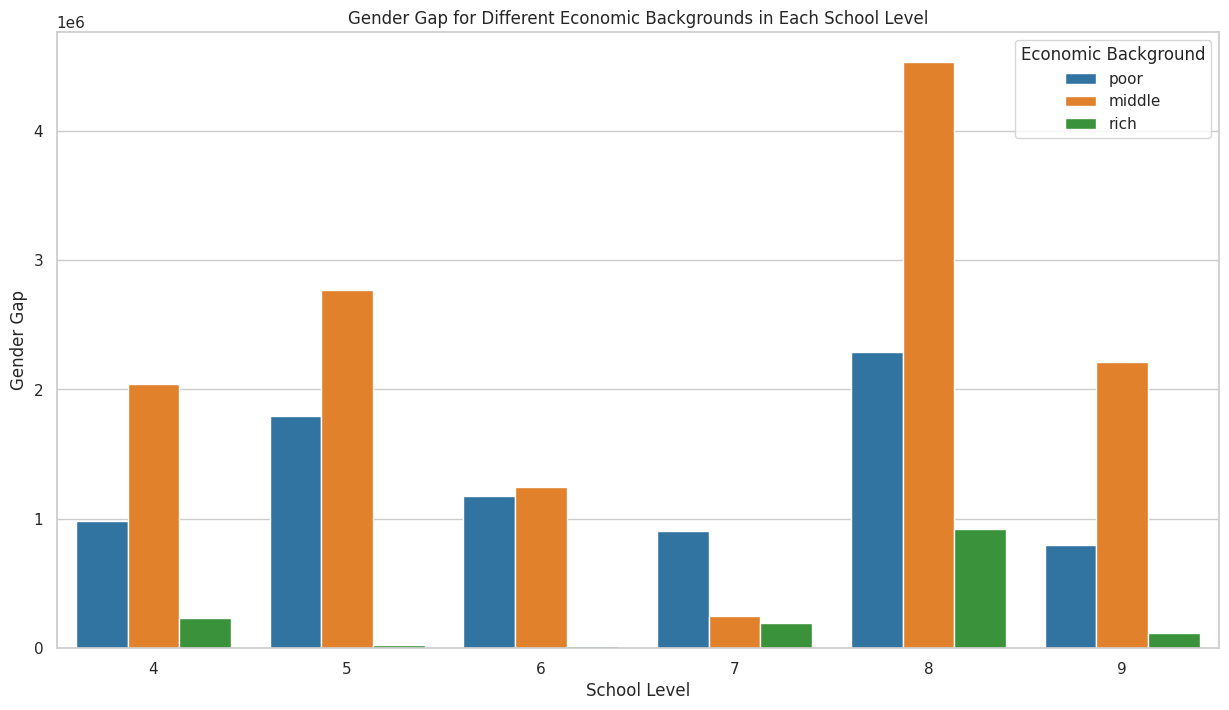

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(15,8))

# Create the bar plot with 'hybrid_score' on the x-axis and different parts for each 'steco_3c'
sns.barplot(x='hybrid_score', y='weighted_gender_gap', hue='steco_3c', data=final_merged, ci=None)

# Transform the hybrid_score
plt.xticks(plt.xticks()[0], plt.xticks()[0] + 4)

# Set labels and title
plt.xlabel('School Level')
plt.ylabel('Gender Gap')
plt.title('Gender Gap for Different Economic Backgrounds in Each School Level')

# Legend title
plt.legend(title='Economic Background')

# Save the plot
plt.savefig('gender_gap_economic_background.png', dpi=300)

# Show the plot
plt.show()

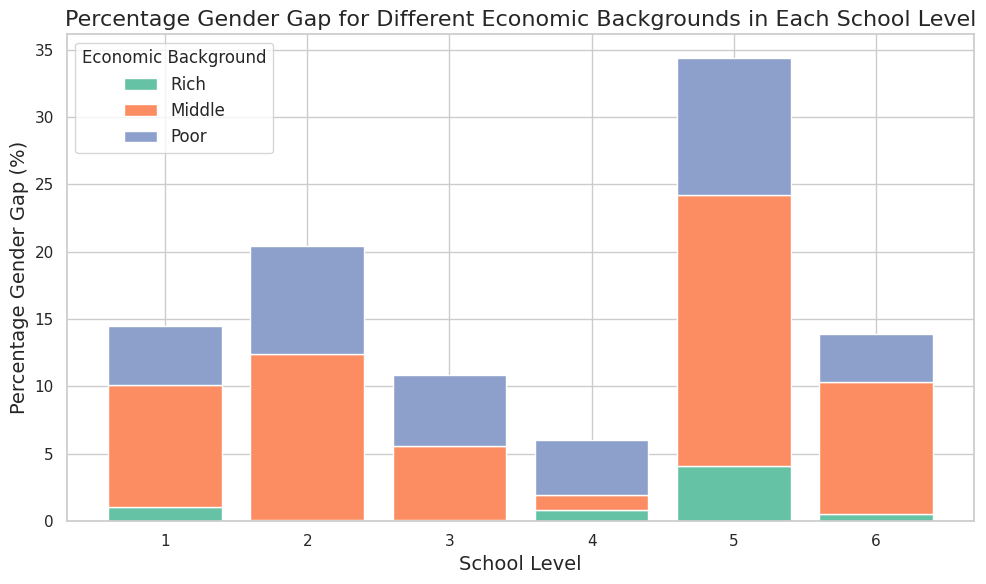

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming final_merged is your DataFrame
# Calculate the total gender gap and the percentage for each category as you did

# Create a pivot table for plotting
pivot_table = final_merged.pivot_table(values='percentage_gender_gap', index='hybrid_score', columns='steco_3c', aggfunc='sum').reset_index()

# Reindexing the hybrid_score by 4
pivot_table['hybrid_score'] = pivot_table['hybrid_score'] - 4  # assuming you want to subtract 4 from each score level

# Getting the Set2 palette colors
colors = sns.color_palette("Set2", n_colors=len(pivot_table.columns) - 1)

# Plotting
plt.figure(figsize=(10,6))
bottom = pd.Series([0] * len(pivot_table.index), index=pivot_table.index)
order = ['rich', 'middle', 'poor']  # define the order in which bars are plotted
for idx, col in enumerate(order):
    plt.bar(pivot_table['hybrid_score'], pivot_table[col], label=col.capitalize(), bottom=bottom, color=colors[idx])
    bottom += pivot_table[col]

plt.xlabel('School Level', fontsize=14)  # Adjusted fontsize
plt.ylabel('Percentage Gender Gap (%)', fontsize=14)  # Adjusted fontsize
plt.title('Percentage Gender Gap for Different Economic Backgrounds in Each School Level', fontsize=16)  # Adjusted fontsize
plt.legend(title='Economic Background', fontsize=12)  # Adjusted fontsize
plt.tight_layout()

# Save with high resolution
plt.savefig('high_res_plot.png', dpi=1200)

plt.show()


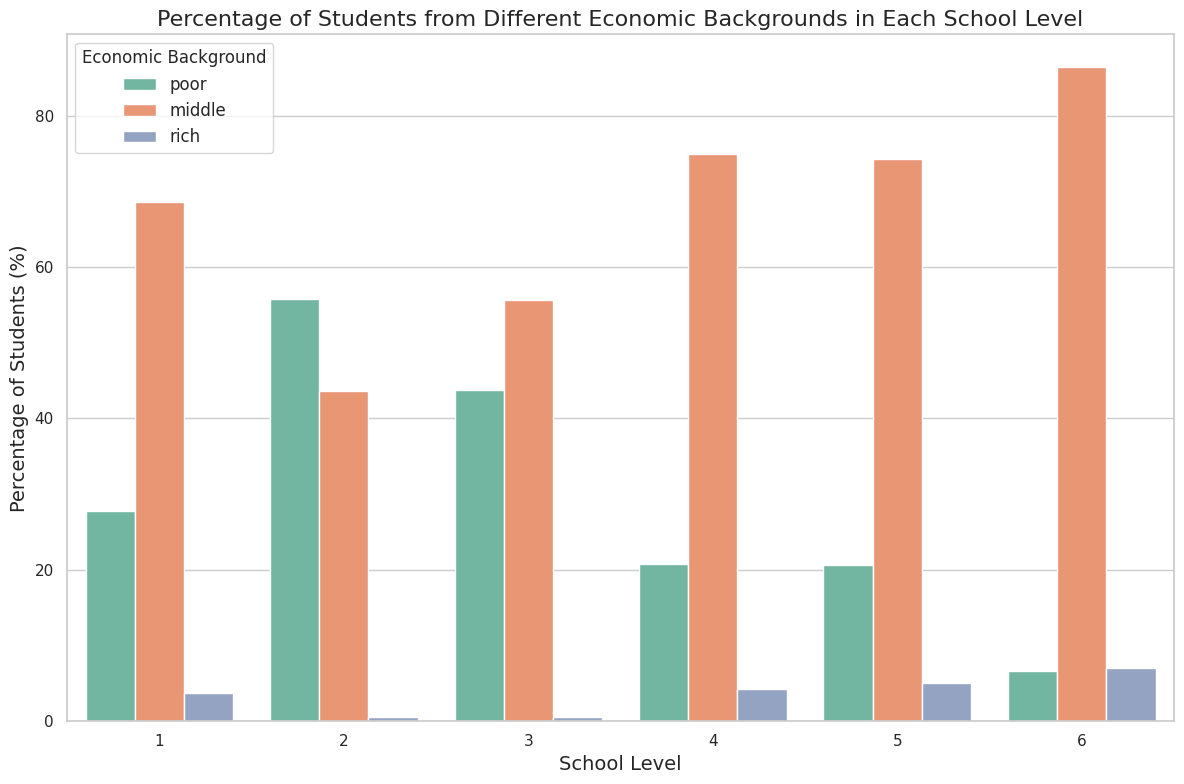

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Style and Context
sns.set_style("whitegrid")
sns.set_context("notebook")

# Assuming df_we is your DataFrame
df_we['transformed_level'] = df_we['hybrid_score'] - 4

# Creating a Pivot Table using transformed_level
pivot_table = df_we.groupby(['transformed_level', 'steco_3c']).size().unstack().fillna(0)

# Normalizing the Pivot Table
pivot_table_percentage = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Plotting the Nested Bar Chart
plt.figure(figsize=(12, 8))  # Adjusted to keep size consistent with other plots
sns.barplot(data=pivot_table_percentage.reset_index().melt(id_vars='transformed_level'),
            x='transformed_level', y='value', hue='steco_3c', palette="Set2")  # Changed to "Pastel1" color palette

plt.xlabel('School Level', fontsize=14)  # Adjusted fontsize
plt.ylabel('Percentage of Students (%)', fontsize=14)  # Adjusted fontsize
plt.title('Percentage of Students from Different Economic Backgrounds in Each School Level', fontsize=16)  # Adjusted fontsize
plt.legend(title='Economic Background', fontsize=12)  # Adjusted fontsize
plt.tight_layout()

# Save the figure before calling plt.show()
plt.savefig('filename.png', dpi=1000)  # Increase dpi as needed
plt.show()


In [ ]:
# Sum 'sweight' for each 'hybrid_score'
school_level_sums = df_we.groupby('hybrid_score')['sweight'].sum().reset_index()

# Calculate the total 'sweight'
total_sweight = df_we['sweight'].sum()

# Calculate the percentage of total 'sweight' for each 'hybrid_score'
school_level_sums['percentage_of_total'] = (school_level_sums['sweight'] / total_sweight) * 100

# Create a table with hybrid_score and the corresponding percentage of the total number of students
percentage_table_students = school_level_sums[['hybrid_score', 'percentage_of_total']]

print(percentage_table_students)

   hybrid_score  percentage_of_total
0             5            16.011110
1             6            22.336882
2             7            13.682439
3             8             8.020437
4             9            27.971619
5            10            11.977512


In [ ]:
# Count unique 'schids' for each 'hybrid_score'
school_count_per_level = df_we.groupby('hybrid_score')['schids'].nunique().reset_index()

# Rename the columns for clarity
school_count_per_level.columns = ['hybrid_score', 'count_of_schools']

# Calculate the total number of schools
total_schools = school_count_per_level['count_of_schools'].sum()

# Calculate the percentage of total schools for each 'hybrid_score'
school_count_per_level['percentage_of_total_schools'] = (school_count_per_level['count_of_schools'] / total_schools) * 100

print(school_count_per_level)

   hybrid_score  count_of_schools  percentage_of_total_schools
0             5                 5                    20.833333
1             6                 3                    12.500000
2             7                 2                     8.333333
3             8                 2                     8.333333
4             9                 8                    33.333333
5            10                 4                    16.666667


<ipython-input-82-2ef6aa19bf72>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='transformed_level', y='weighted_gender_gap_percentage', data=final_result, palette=colors, ci=None)


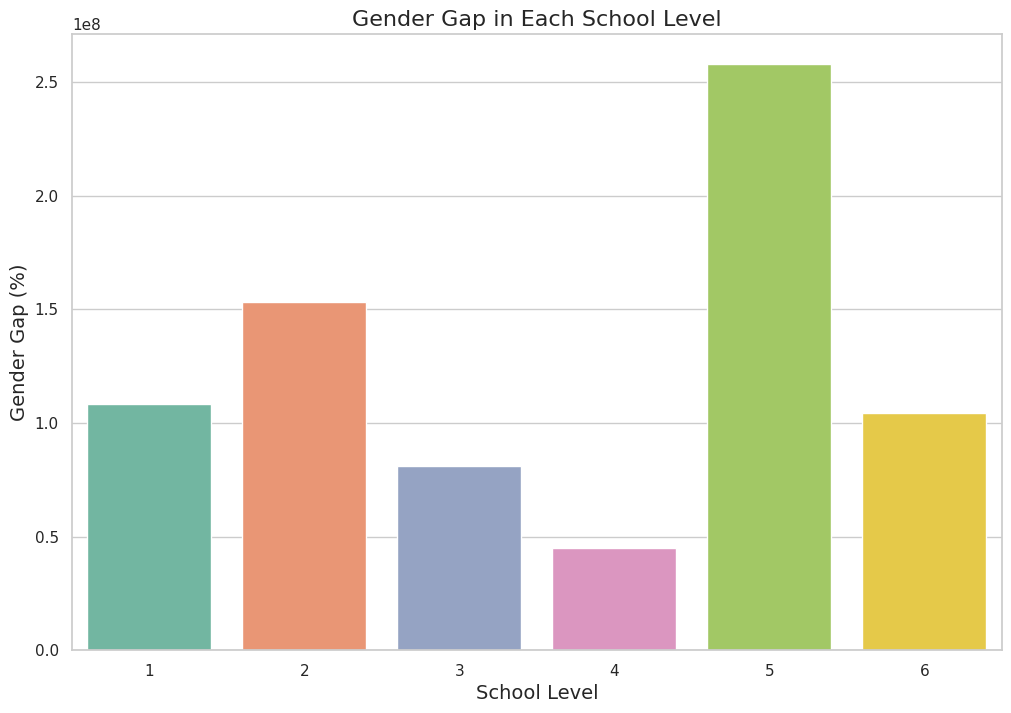

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final_result is your DataFrame
# Transform the hybrid_score and Convert the gender gap to percentage as you did.

# Set the figure size
plt.figure(figsize=(12,8))

# Get the Set2 palette colors
colors = sns.color_palette("Set2")

# Plot the data
sns.barplot(x='transformed_level', y='weighted_gender_gap_percentage', data=final_result, palette=colors, ci=None)

# Set labels and title
plt.xlabel('School Level', fontsize=14)  # Adjusted fontsize
plt.ylabel('Gender Gap (%)', fontsize=14)  # Adjusted fontsize
plt.title('Gender Gap in Each School Level', fontsize=16)  # Adjusted fontsize

# Save the plot
plt.savefig('gender_gap_per_level.png', dpi=300)

# Show the plot
plt.show()
